# 1. Imports

In [96]:
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob
import os

# 2. Load and clean data

In [5]:
conn = sqlite3.connect('../Data/cause_select.db')
df = pd.read_sql("SELECT * "
                 "FROM subjects s "
                 "JOIN conjunctives c "
                 "ON s.participant_id=c.participant_id "
                 "WHERE s.complete=1 "
                 "AND s.recaptcha_complete=1 "
                 "ORDER BY participant_id ASC ", con=conn)

# Exclude test data where "bryan" is in prolific Id.
df = df[df['prolific_pid'].str.match('bryan') == False]
# remove subject for which we have no record of consent
df = df.loc[df.prolific_pid != '5ad63c167f70c10001904bc5']
df['study_version'] = df['study_version'].replace({'pure_conjunction_v1': 'pure_conjunction'})

df = df.loc[:,~df.columns.duplicated()].copy() # prolific id from both tables will be in df, remove duplicate

# slider movements were appended to a list. This loop gets the final value
for rate in ['c1', 'c2', 'c3']:
    df[rate] = df[rate+'_cause_rating'].apply(eval)
    df[rate] = df.apply(lambda row: row[rate][-1], axis=1)

# Report Ns
for version in df.study_version.unique():
    xx = df.loc[df.study_version == version].groupby(['p_c1', 'p_c2', 'p_c3']).id.count()
    print (f'{len(df.loc[df.study_version == version].participant_id.unique())} individuals completed the {version} experiment')
    print(f'for a total of {len(df.loc[df.study_version == version])} sampled observations across probability conditions')
    print(f' The average number of data observations per probability condition is {xx.mean()}, sd= {xx.std()}')


393 individuals completed the mixed_conjunction experiment
for a total of 3975 sampled observations across probability conditions
 The average number of data observations per probability condition is 31.8, sd= 5.726283487624863
397 individuals completed the mixed_disjunction experiment
for a total of 4011 sampled observations across probability conditions
 The average number of data observations per probability condition is 32.088, sd= 5.260957842385247
410 individuals completed the pure_disjunction experiment
for a total of 4109 sampled observations across probability conditions
 The average number of data observations per probability condition is 32.872, sd= 5.42986959981248
399 individuals completed the pure_conjunction experiment
for a total of 4009 sampled observations across probability conditions
 The average number of data observations per probability condition is 32.072, sd= 5.65853052849726


In [3]:
xx = df.groupby('participant_id').count()
xx = xx.reset_index()
df.loc[df.participant_id.isin(xx.loc[xx.prolific_pid != 10].participant_id.tolist())]

,participant_id,prolific_pid,recaptcha_complete,consent,ip_addy,in_progress,complete,start_time,complete_time,study_version,...,p_c3,c1_cause_rating,c2_cause_rating,c3_cause_rating,trl_num,jar_checked,check_correct,c1,c2,c3
540,1sViUWHB7xbWSbui,6347200d8ded5172ec43e0bb,1,1.0,109.147.103.179,0,1,2022-12-03 15:25:23.710089,2022-12-03 15:35:44.022997,pure_disjunction,...,1.0,"[40, 0]","[20, 0]",[100],1,A,1.0,0,0,100
541,1sViUWHB7xbWSbui,6347200d8ded5172ec43e0bb,1,1.0,109.147.103.179,0,1,2022-12-03 15:25:23.710089,2022-12-03 15:35:44.022997,pure_disjunction,...,0.2,"[71, 60, 30]","[80, 90]",[0],2,A,0.0,30,90,0
542,1sViUWHB7xbWSbui,6347200d8ded5172ec43e0bb,1,1.0,109.147.103.179,0,1,2022-12-03 15:25:23.710089,2022-12-03 15:35:44.022997,pure_disjunction,...,0.2,"[71, 60, 30]","[80, 90]",[0],2,None,NaN,30,90,0
543,1sViUWHB7xbWSbui,6347200d8ded5172ec43e0bb,1,1.0,109.147.103.179,0,1,2022-12-03 15:25:23.710089,2022-12-03 15:35:44.022997,pure_disjunction,...,0.4,[100],"[11, 0]","[1, 0]",3,A,1.0,100,0,0
544,1sViUWHB7xbWSbui,6347200d8ded5172ec43e0bb,1,1.0,109.147.103.179,0,1,2022-12-03 15:25:23.710089,2022-12-03 15:35:44.022997,pure_disjunction,...,0.8,[100],[0],[0],4,C,1.0,100,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15900,yGevebtPqJeoRq2J,605e9924e4020478378555d4,1,1.0,83.26.225.181,0,1,2022-12-05 16:29:37.682280,2022-12-05 16:45:20.292138,mixed_disjunction,...,1.0,[50],"[50, 50]","[50, 50, 50]",6,A,1.0,50,50,50
15901,yGevebtPqJeoRq2J,605e9924e4020478378555d4,1,1.0,83.26.225.181,0,1,2022-12-05 16:29:37.682280,2022-12-05 16:45:20.292138,mixed_disjunction,...,0.8,"[100, 85]","[42, 40]",[40],7,B,1.0,85,40,40
15902,yGevebtPqJeoRq2J,605e9924e4020478378555d4,1,1.0,83.26.225.181,0,1,2022-12-05 16:29:37.682280,2022-12-05 16:45:20.292138,mixed_disjunction,...,0.6,[100],[40],[40],8,A,1.0,100,40,40
15903,yGevebtPqJeoRq2J,605e9924e4020478378555d4,1,1.0,83.26.225.181,0,1,2022-12-05 16:29:37.682280,2022-12-05 16:45:20.292138,mixed_disjunction,...,0.8,"[40, 39, 40]","[100, 80]","[100, 80]",9,A,1.0,40,80,80


# 3. Descriptives

## 3.1: Demographics

In [6]:
demos = pd.DataFrame()
for d in glob('../Data/demographics/*.csv'):
    d1 = pd.read_csv(d, header=0, index_col=None, sep=',')
    d1 = d1.loc[d1.Status == "APPROVED"].reset_index(drop=True)
    demos = pd.concat([demos,d1])

demos.loc[demos.Age != 'DATA_EXPIRED', 'Age'] = demos.loc[demos.Age != 'DATA_EXPIRED'].Age.astype(int)

prolific_pids = df.prolific_pid.unique().tolist()
demos = demos.loc[demos['Participant id'].isin(prolific_pids)]

for vrsn in df.study_version.unique():
    demos.loc[demos['Participant id'].isin(df.loc[df.study_version== vrsn].prolific_pid.unique()), 'study_version'] = vrsn

# These are prolific_ids that weren't recorded initially in pure_conjunction study
demos.loc[demos.study_version.isna(), 'study_version'] = 'pure_conjunction'
if sum([x in demos['Participant id'].unique() for x in prolific_pids]) == len(prolific_pids):

    print('you good')
else:
    print(prolific_pids[[x in demos['Participant id'].unique() for x in prolific_pids].index(False)])

61230876ad65890ff8619511


In [8]:
df.loc[df.prolific_pid == '61230876ad65890ff8619511'] # There is no demos for this prolific_id
#demos.groupby('study_version')

,participant_id,prolific_pid,recaptcha_complete,consent,ip_addy,in_progress,complete,start_time,complete_time,study_version,...,p_c3,c1_cause_rating,c2_cause_rating,c3_cause_rating,trl_num,jar_checked,check_correct,c1,c2,c3
1203,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,1.0,"[44, 44, 68, 100]","[43, 43, 42, 29]",[61],1,A,1.0,100,29,61
1204,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,1.0,[100],"[50, 54]","[76, 76, 76]",2,C,1.0,100,54,76
1205,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,1.0,"[99, 99, 100]","[50, 46]","[96, 96, 91]",3,C,1.0,100,46,91
1206,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.4,[100],[56],[58],4,C,1.0,100,56,58
1207,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.4,"[50, 50, 71, 100]",[69],[42],5,A,1.0,100,69,42
1208,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,1.0,[80],"[50, 100]",[100],6,B,1.0,80,100,100
1209,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.2,[82],[63],"[50, 52, 51]",7,B,1.0,82,63,51
1210,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.2,[100],"[50, 50, 50]","[50, 50]",8,C,1.0,100,50,50
1211,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.2,[100],"[50, 50, 51, 53, 58]",[52],9,A,1.0,100,58,52
1212,3z233InkgEYdSlw4,61230876ad65890ff8619511,1,1.0,177.228.190.195,0,1,2022-12-05 14:45:05.450434,2022-12-05 14:54:47.871803,mixed_disjunction,...,0.4,[100],[50],[60],10,B,1.0,100,50,60


In [36]:
demos.loc[(demos.Age != 'DATA_EXPIRED') & (demos.study_version == 'mixed_disjunction')].Age.std()
demos.loc[demos.study_version == 'mixed_conjunction'].groupby('Sex').count()
#demos.loc[(demos.study_version == 'pure_conjunction') & (demos.Sex == 'Female'), 'Participant id'].unique()

,Submission id,Participant id,Status,Started at,Completed at,Reviewed at,Archived at,Time taken,Completion code,Total approvals,Fluent languages,Age,Ethnicity simplified,Country of birth,Country of residence,Nationality,Language,Student status,Employment status,study_version
Sex,,,,,,,,,,,,,,,,,,,,
Female,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195
Male,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198,198


## 3.2. Sampling Distribution over probability configurations

### 3.2.1: Single causal structure

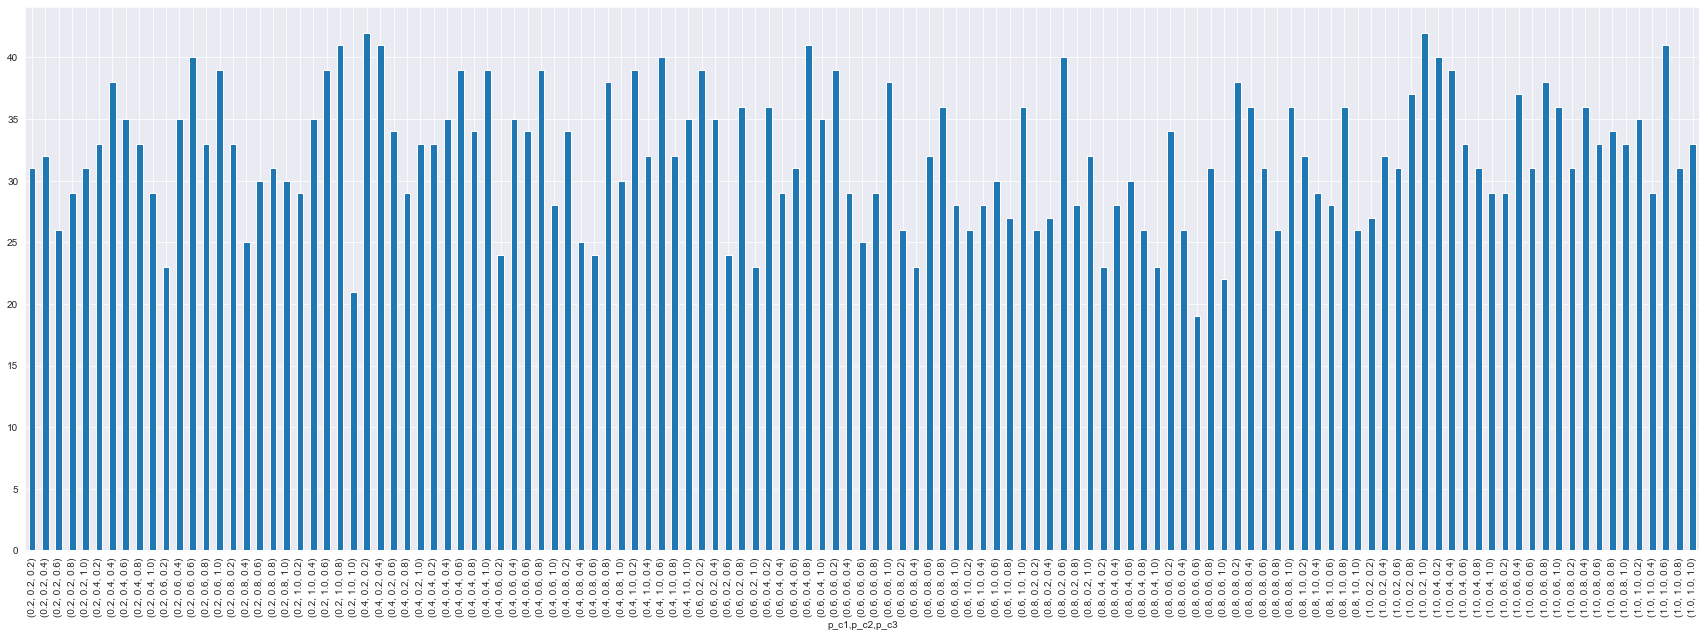

In [11]:
cs_struct = 'mixed_disjunction'
xx = df.loc[df.study_version == cs_struct].groupby(['p_c1', 'p_c2', 'p_c3']).id.count()
xx.plot(figsize=(30, 10), kind='bar', fontsize=10);
#plt.savefig('../Figures/trials_mix_conjunct.png')

### 3.2.2: All Causal Structures

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


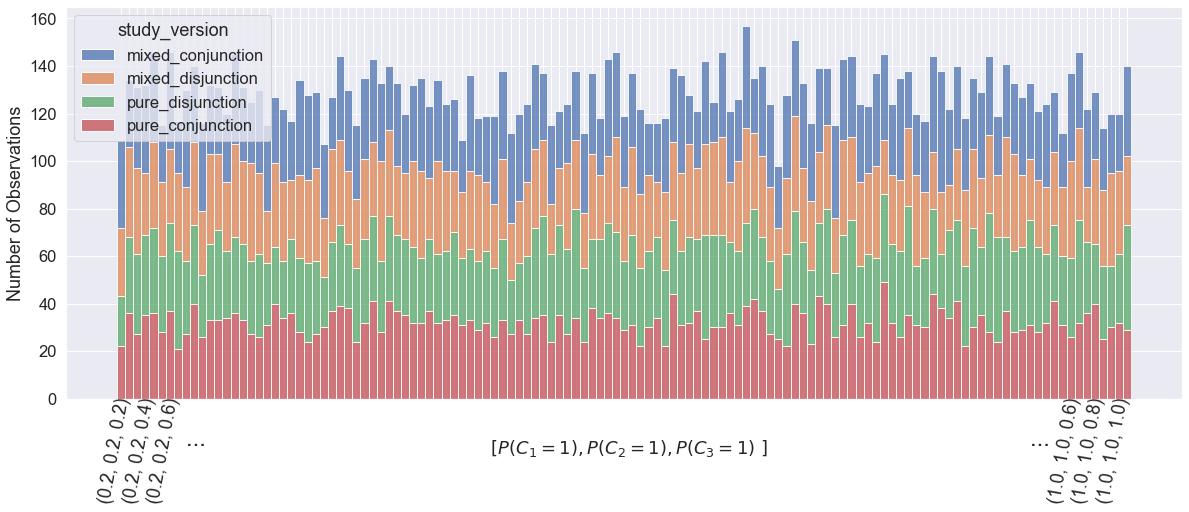

In [22]:
sns.set_context("paper")
sns.set_style("white")
sns.set(font_scale=1.5)
xx = df.groupby(['study_version','p_c1', 'p_c2', 'p_c3']).id.count()
xx.rename('count', inplace=True)

xx = xx.reset_index(level=0)

df['P_C'] = df[['p_c1', 'p_c2', 'p_c3']].astype(str ).apply('_'.join, axis=1)
f, ax = plt.subplots(figsize=(20, 8))
sns.histplot(x='P_C', hue='study_version', data=df, multiple='stack', ax=ax)
#sns.lineplot(x='P_C', hue='study_version', data=df, ax=ax)
#xx = df.groupby(['study_version','p_c1', 'p_c2', 'p_c3']).id.count()
#xx = xx.reset_index()

#xx['triplet'] = xx[['p_c1', 'p_c2', 'p_c3']].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#sns.lineplot(x='triplet', y='id', hue='study_version', data=xx, ax=ax)


ax.set_xticklabels([]);
ax.set_xlabel(' $ \ [ P( C_{1} = 1 ), P( C_{2} = 1 ), P( C_{3} = 1 )\ ]$', labelpad=30);
ax.text(-3, -43, '(0.2, 0.2, 0.2)', rotation=80);
ax.text(0, -43, '(0.2, 0.2, 0.4)', rotation=80);
ax.text(3, -43, '(0.2, 0.2, 0.6)', rotation=80);
ax.text(8, -20, '... ', fontsize=24);
ax.text(112, -20, '... ', fontsize=24);
ax.text(114, -43, '(1.0, 1.0, 0.6)', rotation=80);
ax.text(117, -43, '(1.0, 1.0, 0.8)', rotation=80);
ax.text(120, -43, '(1.0, 1.0, 1.0)', rotation=80);
ax.set_ylabel('Number of Observations')
plt.subplots_adjust(bottom=0.20)
#f.savefig('../Figures/p_count.png', dpi=1000)

In [10]:
xx = df.groupby(['study_version','p_c1', 'p_c2', 'p_c3']).id.count()
xx = xx.reset_index()
#xx.rename('Count', inplace=True)

print(xx.mean())
print(xx.std())

p_c1     0.600
p_c2     0.600
p_c3     0.600
id      32.208
dtype: float64
p_c1    0.283126
p_c2    0.283126
p_c3    0.283126
id      5.519934
dtype: float64


<ipython-input-10-f6834ce0492b>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(xx.mean())
<ipython-input-10-f6834ce0492b>:6: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(xx.std())


            causal ratings

In [44]:
version = 'mixed_conjunction'
df1 = pd.DataFrame(columns=['p_focal', 'focal_cause_rating', 'p_disj', 'p_alt1', 'p_alt2', 'p_disj_focal','p_disj_alt','disj_focal_cause', 'subject', 'version'])
causes = ['c1', 'c2', 'c3']
focal = causes[0]
alt1, alt2 = [c for c in causes if focal not in c]
alts = ['c2', 'c3']
for i, row in tqdm(df.loc[df.study_version == version].iterrows()):
    for ff in [alt1, alt2]:
        alt = [c for c in alts if ff not in c][0]

        df1.loc[len(df1.index)] =  [row['p_'+focal], row[focal],
                                    str(round(min(row['p_'+alt1] + row['p_'+alt2], 1.0), 2)),
                                    row['p_'+alt1], row['p_'+alt2],
                                    row['p_'+ff], row['p_'+alt],
                                    row[ff],
                                    row['participant_id'], version]

df1['diff_conj'] = round(df1.p_focal - df1.p_disj.astype(float), 2)
df1['diff_disj'] = round(df1.p_disj_focal - df1.p_disj_alt, 2)

3975it [00:21, 188.47it/s]


#5.  Average completion time

In [12]:
from ast import literal_eval
from datetime import datetime
#literal_eval(df.complete_time[0])
#datetime.strptime(, '%Y-%M-%d %H:%m:%S')
#df.complete_time[0]
def convert_time(x):
    if type(x) == str:
        return datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f')

df[['start_time', 'complete_time']] = df[['start_time', 'complete_time']].applymap(convert_time)
df['study_duration'] = df.apply(lambda row: row['complete_time'] - row['start_time'], axis=1)

df['study_duration'] = df.study_duration.apply(lambda x: x.total_seconds()/60) # in minutes
timing = df.groupby(['study_version', 'participant_id']).study_duration.mean()
timing = timing.reset_index()
timing#.study_duration.mean()

,study_version,participant_id,study_duration
0,mixed_conjunction,02NgOttOcXmM9Cie,12.082383
1,mixed_conjunction,06da2KIJmKUwm95Z,14.780542
2,mixed_conjunction,0DfzLjElJlN5H21w,8.894536
3,mixed_conjunction,0NMuCaghMlHO729h,8.110535
4,mixed_conjunction,0TqQTZ4UD6pcMVxI,9.382613
...,...,...,...
1594,pure_disjunction,zIPuJlmdYaFToEiY,12.585411
1595,pure_disjunction,zMWFtbyfBgXUXA7a,14.582451
1596,pure_disjunction,zQ4UjVeaoau9lnAd,10.069609
1597,pure_disjunction,zYdYACfoJPhZxS8v,13.752934


13.749569157756813

In [24]:
#sns.histplot(x='study_duration', data=timing.loc[timing.study_version =='pure_disjunction'])
df.loc[df.study_duration > 25].prolific_pid.unique()

array(['611e5cf0c0c5312707f84a6d', '614b413065c09b504a425057',
       '631ba31a4d672ac917aba383', '605baba8fd1a498fb4991a30',
       '601129f77e0c21000b0c408a', '6346adbc3aba776e4e8e7214',
       '62dc6fd89dd8473b3671357e', '5d51a96b5054110015905fd9',
       '5d730a3cf37bfe0001ff031a', '581649f0b434f0000184d2a9',
       '6106ddd6e48453412d0305d1', '617302ac1a5079a4950e855e',
       '615a0b5900f0441ba6598b30', '5ca56e888ef8c300164edb74',
       '5c842b246a4b9b0014c84c30', '5ef5f74fb4a08f2676fb3aba',
       '60d3ebadf9b6777ac8a3f4ea', '604de2ed14e21a37ece24933',
       '5f4d240fad40550ea19a06d8', '5fa5d1ec86ac6817fddaff05',
       '6164b4422e2259bfaa67f33a', '615872108be29e01e6c570f3',
       '60aad516e34718d318bfb44d', '60d63e407fce934334a5e025',
       '6025ba2ad22ee81ad428c38c', '5a4a8802817d1800018d2549',
       '5eb71c59c55b3b0ce571ae7c', '5d76d2f7daf4bf00164d585b',
       '5be064114c6bd000013368f3', '5e7bb30e3f9fe31d223a0f04',
       '5f20983ec1b5461782ad7a61', '5f860adba36f4012cb5

## 3.3: Attention check

In [16]:
attn = df.groupby(['study_version','participant_id']).check_correct.sum()
attn = attn.reset_index()
#attn.check_correct.mean()
attn.check_correct.mean() *10
attn.groupby('study_version').describe()

check_correct                                            \
                          count      mean       std  min  25%   50%   75%   
study_version                                                               
mixed_conjunction         393.0  9.412214  0.843978  4.0  9.0  10.0  10.0   
mixed_disjunction         397.0  9.390428  0.873984  4.0  9.0  10.0  10.0   
pure_conjunction          399.0  9.468672  0.867270  5.0  9.0  10.0  10.0   
pure_disjunction          410.0  9.485366  0.760280  4.0  9.0  10.0  10.0   

                         
                    max  
study_version            
mixed_conjunction  10.0  
mixed_disjunction  10.0  
pure_conjunction   10.0  
pure_disjunction   10.0

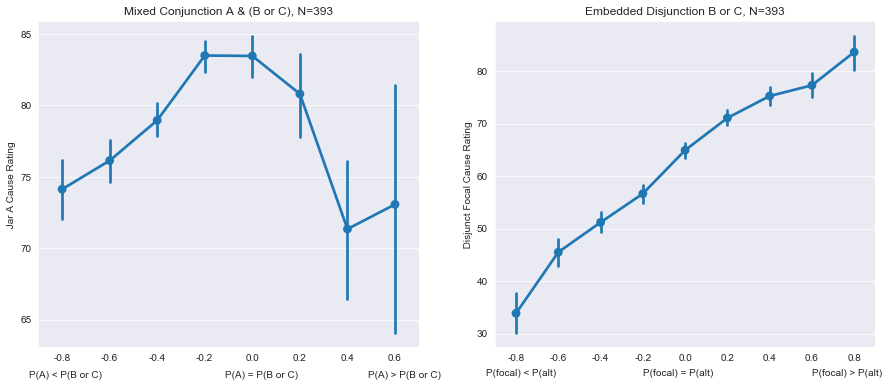

In [58]:
ff, aa = plt.subplots(ncols=2, figsize=(15,6))
g = sns.pointplot(x='diff_conj', y='focal_cause_rating', data=df1, ax=aa[0])
#g.axes.set_ylim([0, 100])
g.axes.xaxis.set_label_text("")
g.axes.text(-.7, 60.95, "P(A) < P(B or C)");
g.axes.text(3.43, 60.95, "P(A) = P(B or C)");
g.axes.text(6.43, 60.95, "P(A) > P(B or C)");
g.axes.yaxis.set_label_text(" Jar A Cause Rating ");
g.title.set_text(f"Mixed Conjunction A & (B or C), N={len(df1.subject.unique())}")

g2 = sns.pointplot(x='diff_disj', y='disj_focal_cause', data=df1, ax=aa[1])
g2.title.set_text(f"Embedded Disjunction B or C, N={len(df1.subject.unique())}")
g2.axes.yaxis.set_label_text(" Disjunct Focal Cause Rating ");
g2.axes.text(-.7, 22, "P(focal) < P(alt)");
g2.axes.text(3, 22, "P(focal) = P(alt)");
g2.axes.text(7, 22, "P(focal) > P(alt)");
g2.axes.xaxis.set_label_text("")

ff.savefig('../Figures/mixC_c1xc2')
#plt.text(-.5, 0, "P(A) < p(B or C)", fontsize=12);
#plt.text(3.2, 0, "P(A) = P(B or C)", fontsize=12);


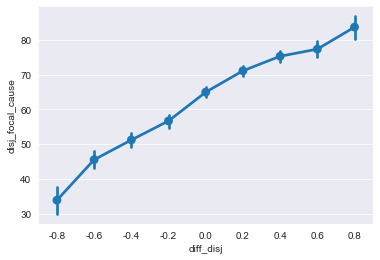

In [43]:
mc = df.loc[df.study_version == 'mixed_conjunction'].melt(id_vars=['p_c1', 'p_c2', 'p_c3'], value_vars=['c1','c2','c3'], var_name='jar', value_name='cause_rating')
mc2 = mc.melt(id_vars=['jar', 'cause_rating'], value_vars=['p_c1', 'p_c2', 'p_c3'], value_name='prob')

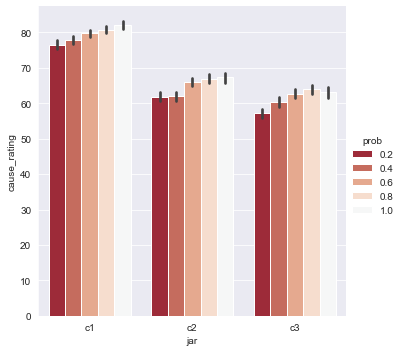

In [9]:
sns.catplot(x='jar', y='cause_rating', kind='bar', hue='prob', hue_order=sorted(mc2.prob.unique()), data=mc2, palette=sns.color_palette("RdBu", 9))


# 4. Reformat Dataframe

In [20]:
df1 = pd.DataFrame(columns=['focal_evnt','alt1_evnt', 'alt2_evnt', 'p_focal', 'focal_cause_rating','p_alt1', 'p_alt2', 'subject', 'version'])
causes = ['c1', 'c2', 'c3']

for version in df.study_version.unique():
    for focal in causes:    # each event serves as focal one time
        alt1, alt2 = [c for c in causes if focal not in c]  # Other two events are alternatives to focal
        for i, row in tqdm(df.loc[df.study_version == version].iterrows()):
            # add p(focal), causal rating for focal, p(alt-1), p(alt-2), subject and version to new dataframe
            df1.loc[len(df1.index)] =  [focal, alt1, alt2, row['p_'+focal], row[focal], str(row['p_'+alt1]), str(row['p_'+alt2]), row['participant_id'], version]


# Normality of focal event *relative* to alternatives
df1['diff_alt1'] = round(df1.p_focal - df1.p_alt1.astype(float), 2)
df1['diff_alt2'] = round(df1.p_focal - df1.p_alt2.astype(float), 2)


3975it [00:09, 431.64it/s]
3975it [00:11, 361.07it/s]
3975it [00:12, 326.58it/s]
4011it [00:14, 274.25it/s]
4011it [00:17, 232.79it/s]
4011it [00:19, 209.73it/s]
4109it [00:22, 185.46it/s]
4109it [00:25, 163.77it/s]
4109it [00:27, 150.43it/s]
4009it [00:29, 137.95it/s]
4009it [00:31, 128.66it/s]
4009it [00:32, 124.52it/s]


In [18]:
print(len(df)*3)
print(len(df1))

48312
48312


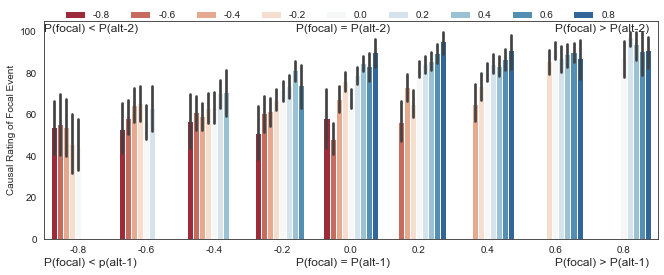

In [11]:
f, a = plt.subplots(figsize=(11, 4))
g = sns.barplot(x='diff_alt1', y='focal_cause_rating', hue='diff_alt2', hue_order=sorted(df1.diff_alt2.unique()),
data=df1, ax=a, palette=sns.color_palette("RdBu", 9))
plt.text(7, -13, "P(focal) > P(alt-1)", fontsize=12);
plt.text(-.5, -13, "P(focal) < p(alt-1)", fontsize=12);
plt.text(3.2, -13, "P(focal) = P(alt-1)", fontsize=12);

sns.move_legend(g.axes, "lower left", bbox_to_anchor=(0.02, .965), ncol=9, title=None, frameon=False);
plt.text(7, 100, "P(focal) > P(alt-2)", fontsize=12);
plt.text(-.5, 100, "P(focal) < P(alt-2)", fontsize=12);
plt.text(3.2, 100, "P(focal) = P(alt-2)", fontsize=12);
g.axes.xaxis.set_label_text(" ");
g.axes.yaxis.set_label_text("Causal Rating of Focal Event");
g.figure.savefig('../Figures/cause_rating2'+version+'.png', dpi=300)

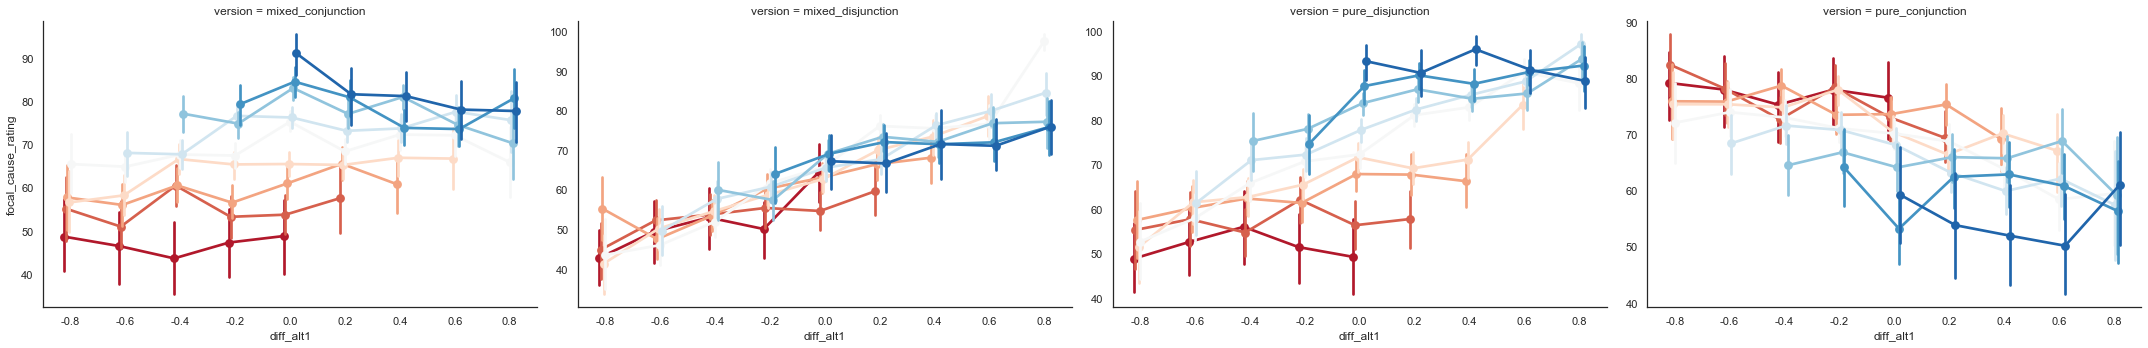

In [10]:

sns.set_theme(style="white")
g = sns.catplot(x='diff_alt1', y='focal_cause_rating', hue='diff_alt2', hue_order=sorted(df1.diff_alt2.unique()),
data=df1, col='version', kind='point', palette=sns.color_palette("RdBu", 9), join=True, dodge=True, sharey=False, aspect=1.5, legend=False)

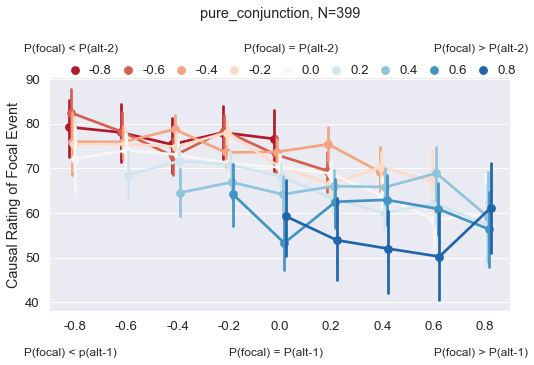

In [36]:

sns.set_theme(style="white")
sns.set(font_scale=1.2)
g = sns.catplot(x='diff_alt1', y='focal_cause_rating', hue='diff_alt2', hue_order=sorted(df1.diff_alt2.unique()),
data=df1.loc[df1.version=='pure_conjunction'], row ='version', kind='point', palette=sns.color_palette("RdBu", 9), join=True, dodge=True, sharey=False, aspect=1.5, legend=False, sharex=False, legend_out=False)

for aa in list(g.axes[:, 0]):
    aa.axes.xaxis.set_label_text(" ");
    aa.axes.yaxis.set_label_text("Causal Rating of Focal Event");
    #aa.set_ylim([40, 100]);
    #aa.axes.axes.set_title(aa.axes.title._text, pad=50)
    aa.axes.axes.set_title(f'{aa.axes.title._text[10:]}, N={len(df.loc[df.study_version== aa.axes.title._text.split("= ")[-1]].participant_id.unique())}', pad=60)
    aa.text(7, 28, "P(focal) > P(alt-1)", fontsize=12);
    aa.text(-1, 28, "P(focal) < p(alt-1)", fontsize=12);
    aa.text(3, 28, "P(focal) = P(alt-1)", fontsize=12);
    aa.text(7, 96, "P(focal) > P(alt-2)", fontsize=12);
    aa.text(-1, 96, "P(focal) < P(alt-2)", fontsize=12);
    aa.text(3.3, 96, "P(focal) = P(alt-2)", fontsize=12);
    aa.axes.legend()
    #sns.move_legend(aa, "lower left", bbox_to_anchor=(0, .96, 1, .9), ncol=9, title=None, frameon=False, columnspacing=-0.1); #
    sns.move_legend(aa, "upper left", bbox_to_anchor=(0, .96, 1.0, .15), ncol=9, title=None, frameon=False, columnspacing=0.2, handletextpad=0.1); #

g.figure.subplots_adjust(hspace=.60)
g.fig.subplots_adjust(top=.8, right=.961)
#g.axes[0][0].title.set_text(f'Pure Disjunction, N={len(df.loc[df.study_version== "pure_disjunction"].participant_id.unique())}')
#g.axes[0][1].axes.axes.set_title(f'Pure Conjunction, N={len(df.loc[df.study_version== "pure_conjunction"].participant_id.unique())}', pad=50)
#g.axes[0][0].axes.axes.set_title(f'Pure Disjunction, N={len(df.loc[df.study_version== "pure_disjunction"].participant_id.unique())}',  pad=50)
#g.figure.set_size_inches(8, 10)
#g.axes_dict['pure_conjunction'].text(-1.8, 120, "A", fontsize=20);
g.figure.savefig('../Figures/cause_rating6c.png', dpi=300)

In [8]:
sns.set_style("white")
g = sns.pointplot(x='diff_alt1', y='focal_cause_rating', data=df1.loc[df1.version == 'pure_conjunction'])
#g.axes.set_ylim([40, 90])
g.axes.set_xlabel('')
g.axes.set_ylabel("Causal Rating of A")
g.axes.text(7, 49, "P(A) > P(B)", fontsize=12);
g.axes.text(3, 49, "P(A) = P(B)", fontsize=12);
g.axes.text(-1, 49, "P(A) < P(B)", fontsize=12);
g.figure.subplots_adjust(bottom=.15)
plt.savefig('../Figures/conj_alt1.png', dpi = 300)

ValueError: style must be one of white, dark, whitegrid, darkgrid, ticks

# 5. Pure Conjunction

## 5.1: p(c1) = p(c2) = p(c3)

<ipython-input-85-383b1c2b5b06>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  equalp = df[df.p_c1 == df.p_c2][df.p_c2 == df.p_c3].loc[df.study_version=='pure_conjunction'].melt(id_vars=['p_c1', 'p_c2', 'p_c3'], value_vars=['c1', 'c2', 'c3'], var_name='event', value_name='cause_rating')


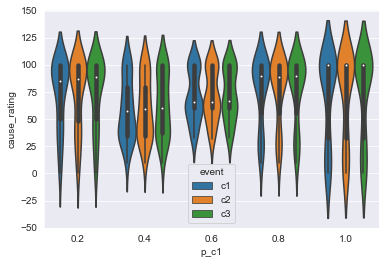

In [85]:
equalp = df[df.p_c1 == df.p_c2][df.p_c2 == df.p_c3].loc[df.study_version=='pure_conjunction'].melt(id_vars=['p_c1', 'p_c2', 'p_c3'], value_vars=['c1', 'c2', 'c3'], var_name='event', value_name='cause_rating')

sns.violinplot(y='cause_rating', hue='event', x='p_c1', data=equalp);
plt.savefig('../Figures/equalp_conj_dist.png', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/Library/Frameworks/Python.framework/Versions/3.8/lib/

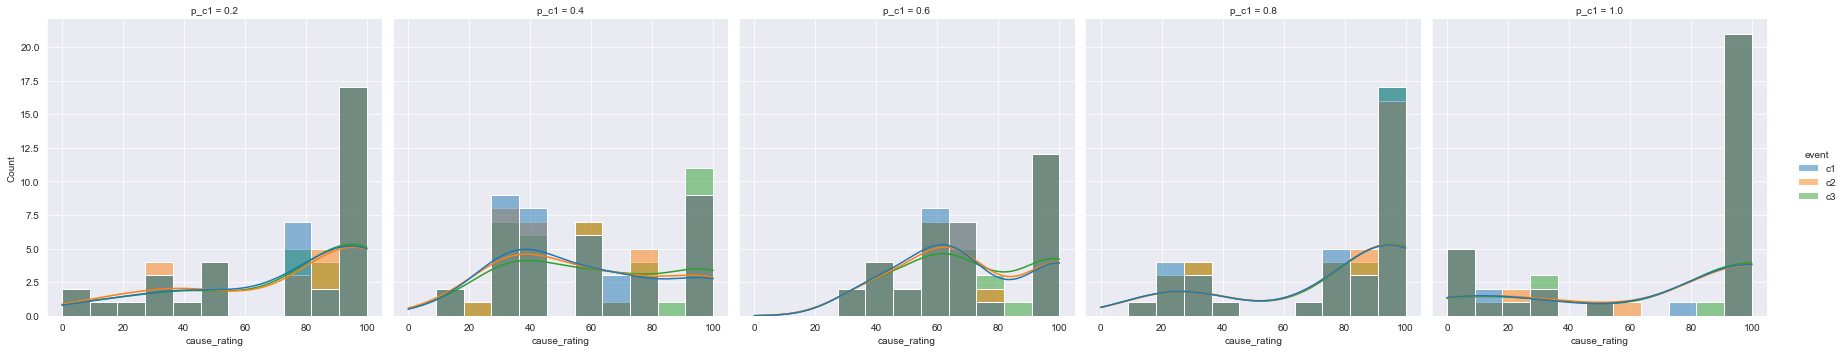

In [83]:
sns.displot(x='cause_rating', hue='event', col='p_c1', data=equalp, kind='hist', kde=True)
#plt.savefig('../Figures/equalp_disj.png', dpi=300)

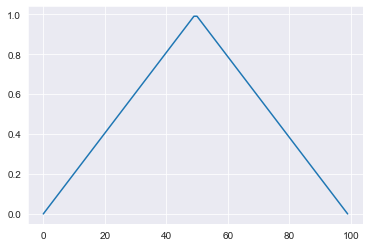

In [107]:
def because_eql(pEvents, nEvents):
    """
    function to model causal attribution in conjunctive systems when the normality of events are equal

    :param pEvent: float; probability of causal events
    :param nEvents: int; number of  necessary event
    :return:causal attribution rating for each event
    """
    uncertainty = min((1 - (1-pEvents)), (1-pEvents)) *2
    rel_norm = 0 #pEvent - pAlt1
    return uncertainty
xx = [because_eql(x, 3) for x in np.linspace(0, 1, 100)]
plt.plot(xx)

In [108]:
causes = {'A':.5, 'B':.5}
focal = 'A'

[c for c in causes if focal not in c]  # Other two events are alternatives to focal

#uncertainty = min((1 - (1-pEvents)), (1-pEvents)) *2


['B']

In [46]:

d1 = df1.loc[df1.version == 'pure_conjunction'].reset_index(drop=True)
d1['p_alt1'] = d1.p_alt1.astype(float)
d1['p_alt2'] = d1.p_alt2.astype(float)


<ipython-input-55-8bf72fbb2cb4>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.displot(x='focal_cause_rating', data=d1[d1.p_focal == d1.p_alt1][d1.p_alt1 == d1.p_alt2]


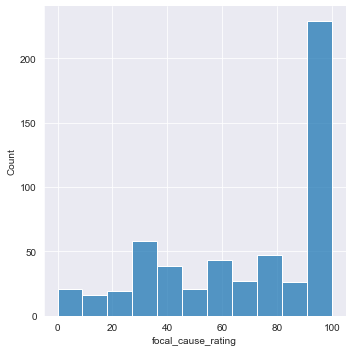

In [55]:
sns.displot(x='focal_cause_rating', data=d1[d1.p_focal == d1.p_alt1][d1.p_alt1 == d1.p_alt2]
,)

In [53]:
#xx = d1[d1.p_focal == d1.p_alt1]
#xx[xx.p_alt1 == xx.p_alt2]
d1[d1.p_focal == d1.p_alt1][d1.p_alt1 == d1.p_alt2]

<ipython-input-53-cc53956929ae>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  d1[d1.p_focal == d1.p_alt1][d1.p_alt1 == d1.p_alt2]


,focal_evnt,alt1_evnt,alt2_evnt,p_focal,focal_cause_rating,p_alt1,p_alt2,subject,version,diff_alt1,diff_alt2
80,c1,c2,c3,0.4,40,0.4,0.4,1FjqNZejpTp92l2w,pure_conjunction,0.0,0.0
98,c1,c2,c3,1.0,100,1.0,1.0,1MN8UEwZPuC8aLoy,pure_conjunction,0.0,0.0
148,c1,c2,c3,1.0,95,1.0,1.0,1xugLox0LaOsx5xd,pure_conjunction,0.0,0.0
151,c1,c2,c3,1.0,34,1.0,1.0,21FlcOF7ezuifwRd,pure_conjunction,0.0,0.0
152,c1,c2,c3,0.6,34,0.6,0.6,21FlcOF7ezuifwRd,pure_conjunction,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11878,c3,c1,c2,0.6,100,0.6,0.6,xcYx4bGJ2Du0PAif,pure_conjunction,0.0,0.0
11893,c3,c1,c2,0.8,100,0.8,0.8,xtbu3dGOBI2A6LKC,pure_conjunction,0.0,0.0
11913,c3,c1,c2,0.6,40,0.6,0.6,yNNcgQ3YXYbtAPgL,pure_conjunction,0.0,0.0
11947,c3,c1,c2,0.2,95,0.2,0.2,z3cu0OgfaTlEATeZ,pure_conjunction,0.0,0.0


In [33]:
def because(pEvent, pAlt1):
    """
    function to model causal attribution in conjunctive systems as a function of the relative normality of the focal event as compared to alternatives.

    :param pEvent: float; probability of focal event
    :param pAlt1: float; probability of alternative necessary event
    :return:causal attribution rating for focal event
    """
    rel_norm = pEvent - pAlt1
    return 1 - rel_norm